# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [12]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [13]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


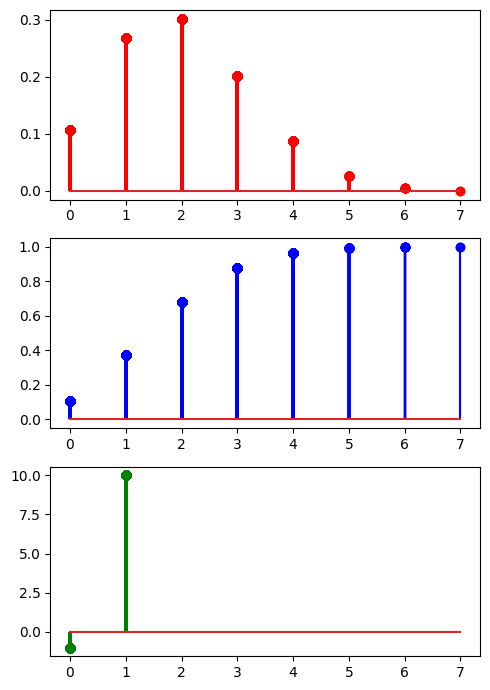

In [14]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

Density at 0: 0.3989422804014327
Probability value is less than 1.96: 0.9750021048517795
Value at 0.95 cumulative probability: 1.6448536269514722


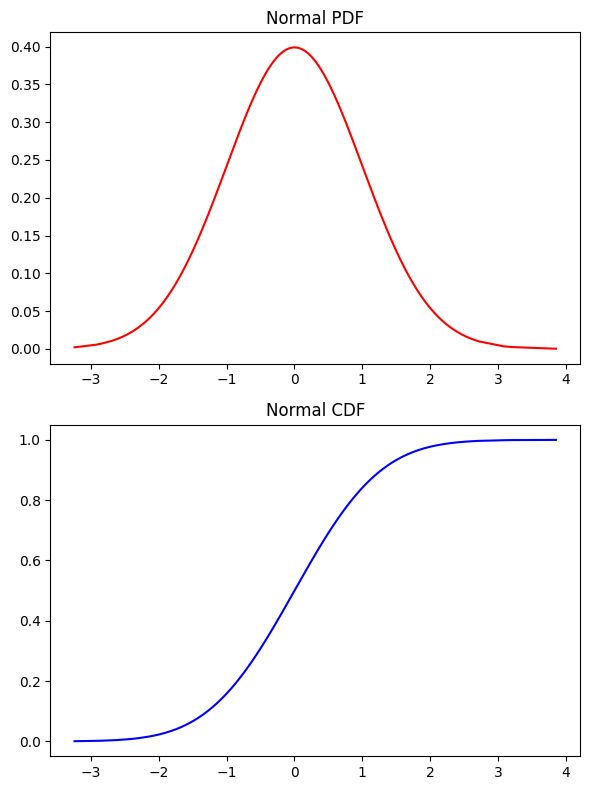

In [15]:
# Normal Distribution Functions

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Function Definitions ---
def dnorm(x, mean=0, sd=1):
    """Calculates the Probability Density Function (PDF)"""
    return norm.pdf(x, loc=mean, scale=sd)

def pnorm(q, mean=0, sd=1):
    """Calculates the Cumulative Distribution Function (CDF)"""
    return norm.cdf(q, loc=mean, scale=sd)

def qnorm(p, mean=0, sd=1):
    """Calculates the Quantile Function (Inverse CDF)"""
    return norm.ppf(q=p, loc=mean, scale=sd)

def rnorm(n, mean=0, sd=1):
    """Generates random variables from the distribution"""
    return norm.rvs(loc=mean, scale=sd, size=n)

# --- Execution and Printing ---
np.random.seed(42)
mu, sigma = 0, 1  # Standard Normal Distribution

print(f"Density at 0: {dnorm(0, mu, sigma)}")
print(f"Probability value is less than 1.96: {pnorm(1.96, mu, sigma)}")
print(f"Value at 0.95 cumulative probability: {qnorm(0.95, mu, sigma)}")

# --- Plotting ---
data = rnorm(2000, mu, sigma)
data_sorted = np.sort(data) # Sorted for smooth line plotting

pdf = dnorm(data_sorted, mu, sigma)
cdf = pnorm(data_sorted, mu, sigma)

fig, axis = plt.subplots(2, 1, figsize=(6, 8))

axis[0].plot(data_sorted, pdf, "r-", label="PDF (Density)")
axis[0].set_title("Normal PDF")
axis[1].plot(data_sorted, cdf, "b-", label="CDF (Cumulative)")
axis[1].set_title("Normal CDF")

plt.tight_layout()
plt.show()

Density at 5: 0.1
Probability value is less than 2: 0.2
Value at 0.5 cumulative probability: 5.0


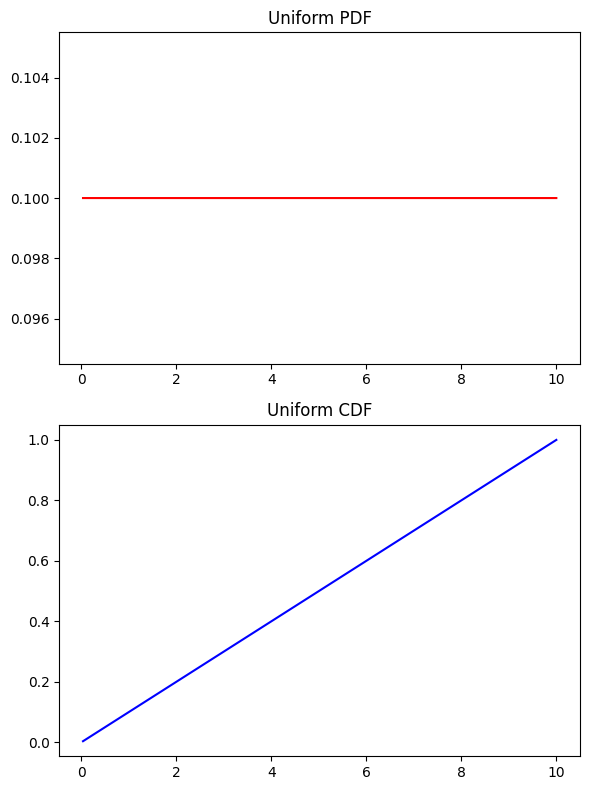

In [16]:
#Uniform Distribution Functions

from scipy.stats import uniform

# --- Function Definitions ---
def dunif(x, min_val=0, max_val=1):
    """Calculates the Probability Density Function (PDF)"""
    # SciPy uses loc=start, scale=width
    return uniform.pdf(x, loc=min_val, scale=max_val - min_val)

def punif(q, min_val=0, max_val=1):
    """Calculates the Cumulative Distribution Function (CDF)"""
    return uniform.cdf(q, loc=min_val, scale=max_val - min_val)

def qunif(p, min_val=0, max_val=1):
    """Calculates the Quantile Function (Inverse CDF)"""
    return uniform.ppf(q=p, loc=min_val, scale=max_val - min_val)

def runif(n, min_val=0, max_val=1):
    """Generates random variables from the distribution"""
    return uniform.rvs(loc=min_val, scale=max_val - min_val, size=n)

# --- Execution and Printing ---
np.random.seed(42)
a, b = 0, 10 # Range from 0 to 10

print(f"Density at 5: {dunif(5, a, b)}")
print(f"Probability value is less than 2: {punif(2, a, b)}")
print(f"Value at 0.5 cumulative probability: {qunif(0.5, a, b)}")

# --- Plotting ---
data = runif(2000, a, b)
data_sorted = np.sort(data)

pdf = dunif(data_sorted, a, b)
cdf = punif(data_sorted, a, b)

fig, axis = plt.subplots(2, 1, figsize=(6, 8))

axis[0].plot(data_sorted, pdf, "r-")
axis[0].set_title("Uniform PDF")
axis[1].plot(data_sorted, cdf, "b-")
axis[1].set_title("Uniform CDF")

plt.tight_layout()
plt.show()